In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

In [3]:
train_data = pd.read_csv('./input/train.csv', delimiter=',')
test_data = pd.read_csv('./input/test.csv', delimiter=',')

In [4]:
n_train = train_data.shape[0]
n_test = test_data.shape[0]

y_train = train_data['y']

In [5]:
# concat dataframes and drop unnecessary columns
full_data = pd.concat([train_data, test_data], sort=False)
full_data = full_data.drop('y', axis=1, inplace=False)
full_data = full_data.drop('sample_id', axis=1, inplace=False)

In [6]:
full_data.sample(10)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1602,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611
394,31.750000,6.335938,3.605469,8.804688,160.375,126.1250,1.761719,6.425781,4.464844,7.847656,...,3.464844,7.886719,4.125000,4.781250,5.414062,5.976562,6.363281,6.828125,7.210938,7.511719
85,26.921875,6.523438,3.492188,8.312500,166.875,108.1250,1.477539,6.554688,7.449219,8.007812,...,3.761719,6.789062,4.289062,4.796875,5.210938,5.609375,5.847656,6.082031,6.343750,6.617188
151,33.218750,6.324219,3.482422,9.460938,154.250,132.0000,1.871094,6.429688,7.625000,7.871094,...,3.314453,6.125000,3.865234,4.402344,4.875000,5.183594,5.425781,5.734375,5.886719,5.921875
798,24.515625,6.011719,3.076172,6.148438,164.375,98.3125,1.477539,6.113281,3.021484,7.589844,...,3.839844,6.496094,4.386719,4.910156,5.390625,5.734375,5.628906,5.726562,5.910156,6.167969
481,26.296875,6.261719,3.726562,9.695312,159.000,104.3750,1.768555,6.363281,5.164062,7.667969,...,3.625000,7.367188,4.148438,4.761719,5.308594,5.761719,6.070312,6.519531,6.863281,7.117188
395,21.500000,6.003906,3.275391,6.667969,163.125,84.6875,1.510742,6.085938,3.224609,7.511719,...,4.007812,7.753906,4.574219,5.101562,5.636719,6.187500,6.320312,6.699219,7.070312,7.414062
744,24.656250,6.312500,3.699219,8.601562,164.125,97.5625,1.560547,6.382812,4.699219,7.757812,...,3.636719,7.968750,4.273438,4.898438,5.570312,6.105469,6.492188,6.941406,7.386719,7.777344
56,40.437500,7.710938,3.240234,13.968750,169.250,163.1250,1.610352,7.652344,15.921875,9.164062,...,2.996094,0.000000,3.433594,3.177734,3.496094,3.433594,3.091797,2.996094,2.564453,0.000000
337,24.578125,6.195312,3.052734,5.937500,166.625,96.8750,1.382812,6.242188,5.148438,7.777344,...,3.496094,5.503906,3.951172,4.382812,4.812500,5.101562,5.335938,5.464844,5.554688,5.457031
245,23.812500,6.484375,3.460938,8.437500,166.875,94.7500,1.394531,6.515625,5.929688,7.957031,...,3.650391,7.988281,4.312500,4.972656,5.656250,6.304688,6.796875,7.250000,7.578125,7.921875


In [7]:
# replace infinity values
full_data = full_data.replace([np.inf, -np.inf], np.nan)

In [8]:
total = full_data.isnull().sum().sort_values(ascending=False)
columns = total.index.to_list()
values = total[:].to_list()
percents = (full_data.isnull().sum() / full_data.isnull().count()).sort_values(ascending=False)
miss_values = pd.DataFrame({'Missing Values': values, 'Percent': percents}, index=columns)
miss_values

,Missing Values,Percent
f805,1289,1.0
f846,1289,1.0
f835,1289,1.0
f839,1289,1.0
f842,1289,1.0
f843,1289,1.0
f844,1289,1.0
f845,1289,1.0
f847,1289,1.0
f833,1289,1.0


In [9]:
# sum of empty rows
full_data.isnull().all(axis=1).sum()

0

In [10]:
# drop empty columns
empty_columns = miss_values[miss_values['Percent'] == 1.0].index.to_list()
full_data = full_data.drop(empty_columns, axis=1, inplace=False)

In [11]:
# replace empty values with 0
full_data = full_data.fillna(0, inplace=False)

In [12]:
full_data.sample(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1602,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611
203,26.812500,5.929688,3.394531,5.851562,162.625,108.31250,1.597656,6.066406,2.337891,7.511719,...,3.525391,7.761719,4.109375,4.683594,5.261719,5.859375,6.171875,6.609375,7.050781,7.445312
160,25.796875,5.925781,3.294922,6.148438,161.125,103.93750,1.588867,6.054688,3.132812,7.511719,...,3.701172,7.980469,4.332031,4.953125,5.566406,6.183594,6.500000,6.937500,7.351562,7.773438
188,26.546875,6.125000,3.160156,6.312500,163.125,107.62500,1.536133,6.230469,4.796875,7.691406,...,3.583984,5.582031,4.109375,4.570312,4.976562,5.457031,5.453125,5.390625,5.214844,5.398438
300,16.218750,5.601562,2.705078,3.214844,163.750,63.21875,1.336914,5.683594,2.326172,7.222656,...,3.294922,5.039062,3.701172,4.125000,4.507812,4.863281,4.773438,5.031250,5.050781,5.050781
913,31.843750,5.777344,3.224609,5.203125,159.125,128.75000,1.786133,5.941406,2.146484,7.425781,...,3.400391,7.121094,3.970703,4.511719,5.093750,5.683594,5.894531,6.292969,6.707031,7.035156


In [13]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.mllib.stat import Statistics

In [14]:
spark = SparkSession \
    .builder \
    .appName("BigDataAnalyzer") \
    .getOrCreate()

In [15]:
# wrap pandas df to spark df
temp_df = train_data.drop('sample_id', axis=1, inplace=False)
spark_df = spark.createDataFrame(temp_df)

In [16]:
# compute pearson corr matrix
df_rdd = spark_df.rdd.map(lambda row: row[:])
spark_corr = Statistics.corr(df_rdd, method='pearson')

In [17]:
# wrap to pandas df
pandas_cor = pd.DataFrame(spark_corr,
                columns=spark_df.columns, 
                index=spark_df.columns)

In [18]:
# stop spark
spark.stop()

In [19]:
columns

['f805',
 'f846',
 'f835',
 'f839',
 'f842',
 'f843',
 'f844',
 'f845',
 'f847',
 'f833',
 'f848',
 'f850',
 'f852',
 'f854',
 'f855',
 'f856',
 'f834',
 'f831',
 'f904',
 'f817',
 'f795',
 'f798',
 'f803',
 'f810',
 'f812',
 'f816',
 'f819',
 'f830',
 'f820',
 'f821',
 'f822',
 'f823',
 'f824',
 'f826',
 'f896',
 'f905',
 'f786',
 'f956',
 'f946',
 'f949',
 'f952',
 'f953',
 'f954',
 'f955',
 'f957',
 'f944',
 'f958',
 'f960',
 'f962',
 'f964',
 'f965',
 'f966',
 'f945',
 'f943',
 'f908',
 'f929',
 'f913',
 'f915',
 'f920',
 'f922',
 'f926',
 'f927',
 'f930',
 'f941',
 'f931',
 'f932',
 'f933',
 'f934',
 'f936',
 'f940',
 'f794',
 'f836',
 'f963',
 'f853',
 'f818',
 'f837',
 'f947',
 'f928',
 'f903',
 'f793',
 'f802',
 'f912',
 'f857',
 'f967',
 'f811',
 'f921',
 'f916',
 'f806',
 'f961',
 'f906',
 'f796',
 'f851',
 'f901',
 'f791',
 'f900',
 'f790',
 'f968',
 'f858',
 'f804',
 'f914',
 'f894',
 'f784',
 'f859',
 'f969',
 'f814',
 'f924',
 'f870',
 'f785',
 'f895',
 'f910',
 'f800',
 

In [20]:
selected_data = full_data

In [21]:
selected_data.shape

(1289, 1540)

In [22]:
selected_data.loc[:, 'n_f1'] = np.log1p(full_data['f224'] + full_data['f523'])

In [23]:
selected_data.loc[:, 'n_f2'] = np.log1p(full_data['f558'] + full_data['f557'] )

In [24]:
selected_data.loc[:, 'n_f3'] = np.log1p(full_data['f549'] + full_data['f542'] )

In [25]:
selected_data.loc[:, 'n_f4'] = np.log1p(full_data['f564'] + full_data['f566'])

In [26]:
selected_data.loc[:, 'n_f5'] = np.log1p(full_data['f564'] + full_data['f557'])

In [27]:
# find N the most important features
n_features = 400
columns = pandas_cor.nlargest(n_features, 'y').index[1:]

In [28]:
indexes = [i for i in range(n_features-1)]
np.random.seed(10)      
np.random.shuffle(indexes)

In [29]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=2, random_state=5)
selected_data.loc[:, 'clus_f1'] = k_means.fit_predict(full_data.loc[:, columns[indexes[:100]]])
selected_data.loc[:, 'clus_f2'] = k_means.fit_predict(full_data.loc[:, columns[indexes[100:200]]])
selected_data.loc[:, 'clus_f3'] = k_means.fit_predict(full_data.loc[:, columns[indexes[200:300]]])
selected_data.loc[:, 'clus_f4'] = k_means.fit_predict(full_data.loc[:, columns[indexes[300:400]]])

In [30]:
new_columns = ['n_f1', 'n_f2', 'n_f3', 'n_f4', 'n_f5', 'clus_f1', 'clus_f2','clus_f3', 'clus_f4']
selected_data.loc[:, 'clus_f5'] = k_means.fit_predict(full_data.loc[:, new_columns])

In [31]:
selected_data.shape

(1289, 1550)

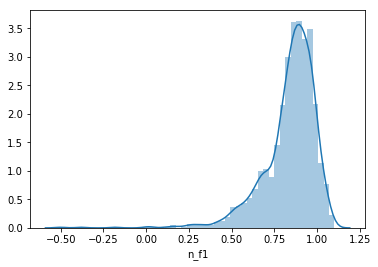

In [32]:
sns.distplot(selected_data['n_f1'])

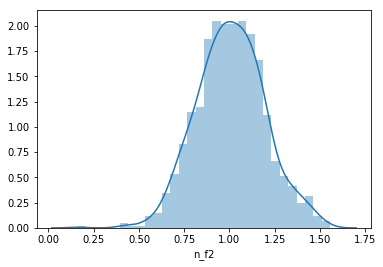

In [33]:
sns.distplot(selected_data['n_f2'])

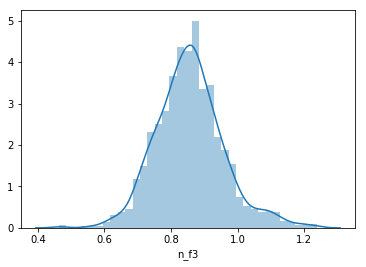

In [34]:
sns.distplot(selected_data['n_f3'])

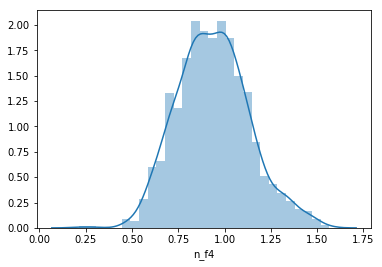

In [35]:
sns.distplot(selected_data['n_f4'])

In [48]:
train_preprocessed = selected_data[:n_train]
train_preprocessed.loc[:, 'y'] = train_data['y']
test_preprocessed = selected_data[n_train:]
test_preprocessed = test_preprocessed.set_index(test_data['sample_id']);

In [49]:
train_preprocessed.sample(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,n_f2,n_f3,n_f4,n_f5,clus_f1,clus_f2,clus_f3,clus_f4,clus_f5,y
301,24.937500,6.820312,2.976562,8.546875,171.500,98.3750,1.185547,6.804688,7.796875,8.312500,...,0.931410,0.926009,0.941174,0.924848,0,0,0,0,0,0.0
4,20.109375,6.144531,3.203125,6.035156,164.750,78.8750,1.281250,6.187500,4.003906,7.734375,...,1.061473,0.893711,1.048723,1.038405,1,1,0,0,1,0.0
454,26.515625,6.859375,3.333984,9.820312,171.375,104.8750,1.294922,6.859375,7.179688,8.296875,...,0.909431,0.913553,0.948009,0.935634,0,0,0,0,0,1.0
1023,32.187500,6.976562,3.507812,11.304688,165.125,127.6875,1.495117,6.992188,7.417969,8.453125,...,1.009824,0.893374,0.942126,0.928134,0,0,0,0,0,0.0
510,20.453125,6.199219,2.785156,6.535156,167.750,80.2500,1.256836,6.234375,4.609375,7.761719,...,0.949144,1.054406,0.878475,0.895570,0,0,0,0,0,1.0


In [50]:
test_preprocessed.sample(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,n_f1,n_f2,n_f3,n_f4,n_f5,clus_f1,clus_f2,clus_f3,clus_f4,clus_f5
sample_id,,,,,,,,,,,,,,,,,,,,,
sample_1242,21.453125,6.109375,3.531250,7.062500,162.375,84.5000,1.436523,6.175781,3.919922,7.656250,...,0.947157,1.166563,0.899153,1.031640,1.037540,1,1,0,0,1
sample_1176,49.625000,6.839844,2.619141,8.156250,173.250,206.8750,1.541016,7.019531,6.746094,8.554688,...,0.410174,0.851127,1.073562,0.886355,0.830273,0,0,0,0,0
sample_1275,20.953125,6.234375,2.904297,6.953125,166.875,82.3125,1.281250,6.269531,6.421875,7.789062,...,0.795733,0.628088,0.961400,0.538895,0.538040,0,0,0,0,0
sample_1194,31.218750,6.546875,3.644531,9.101562,166.125,126.0625,1.541016,6.636719,4.851562,8.054688,...,0.759957,1.095678,1.024304,0.975628,1.005010,0,0,0,0,0
sample_1260,26.843750,6.621094,3.810547,10.515625,162.000,106.3750,1.541992,6.671875,7.777344,8.070312,...,0.847054,0.920384,0.783652,0.716076,0.734750,1,1,0,0,1


In [51]:
train_preprocessed.to_csv('input/train_preprocessed.csv',index=False)

In [52]:
test_preprocessed.to_csv('input/test_preprocessed.csv', index=True)